# Optimization of HVAC System Parameters Using Machine Learning


## 0. Imports


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
import xgboost as xgb
from IPython.display import display, Markdown

## 1. Abstract

Heating, ventilation, and air conditioning (HVAC) systems account for 10–20% of annual energy use in developed countries, with up to 30% of this energy commonly wasted due to inefficient management and control methods. To address this issue and enhance energy efficiency, this paper introduces a predictive modeling approach that utilizes machine learning and deep learning models to accurately forecast HVAC system parameters. The project includes a case analysis of an air handling unit (AHU) in Chicago, IL, to validate the proposed method. Three models were tested to predict the supply air temperature, and their predictions were compared to actual temperature measurements to evaluate accuracy. Results show that each model effectively predicted the supply air temperature, with XGBoost achieving the highest accuracy among the models tested.


## 2. Introduction

### 2.1 What is HVAC System

HVAC or Heating Ventilation Air Conditioning systems are a major contributor to power consumption in European countries. A great opportunity arises for energy savings, due to many HVAC systems being not properly maintained nor optimized. Such systems are important for maintaining proper IAQ (indoor air quality) in the human occupied rooms in the building. Optimal control of HVAC can lead to significant resources spent reduction.

A Heating Ventilation and Air Conditioning (or HVAC) system is a group of components working on maintaining desired air conditions indoors.
Typical main HVAC components are:

1. Heating part<br>
   1.1 Boiler for heating up water or steam in the system. Boilers are typically fuelled with electricity or natural gas.<br>
   1.2 Furnace for heating up air. Natural gas or electricity are main fuelling options.<br>
   1.3 Electrical Heating Coils for heating air.<br>
2. Ventilation part<br>
   2.1 MUA (Make-up air) exhaust systems like kitchen hoods, bathroom ventilation.<br>
   2.2 Air pressure controlling systems.<br>
3. Air Conditioning part<br>
   3.1 Chilled water and refrigeration systems for removing heat from the air.<br>
   3.2 Air temperature control systems.<br>
   3.3 Humidity control systems.<br>
   3.4 Air filtering systems.<br>
   3.5 Air velocity, volume, and direction of airflow controls.<br>
   3.5 Outside systems for processing incoming outdoors air such as: supply and return air ducts, fans, air inlets and outlets.<br>

<img src="1. HVAC SYSTEM.png" style="width: 500px;"/>

Figure 1. Inside looks of the HVAC system.

Figure 2 shows the schematic diagram of Air Handling Unit (AHU)

<img src="11. AHU.png" style="width: 500px;"/>

Figure 2. Air handling unit schematic drawing view with single thermal zone in the variable air volume (VAV) system.


### 2.2 Problem Definition

HVAC systems are integral components of modern infrastructure, responsible for maintaining comfortable indoor environments in residential, commercial, and industrial settings. In developed countries, these systems consume a significant portion of total energy—between 10% and 20% annually. However, inefficiencies in HVAC operation often result in substantial energy wastage, with studies indicating that up to 30% of energy consumption can be attributed to poor management practices and inadequate control strategies. This inefficiency not only increases operational costs but also contributes to environmental concerns such as increased carbon emissions and resource depletion. Furthermore, with global energy demands on the rise and an increasing emphasis on sustainability, optimizing HVAC performance has become crucial for energy conservation and the reduction of environmental impact.


### 2.3 Motivation and Relevance

The importance of addressing HVAC inefficiencies is underscored by the dual pressures of economic and environmental sustainability. As energy costs continue to rise, businesses and homeowners alike are seeking ways to reduce their energy bills, making the optimization of HVAC systems a financially attractive solution. Additionally, with climate change intensifying, there is a growing urgency to minimize energy consumption and carbon footprints. Implementing predictive modeling techniques that leverage machine learning can provide accurate forecasts of HVAC system parameters, enabling proactive adjustments that enhance energy efficiency. The potential applications of this project extend beyond energy savings. Improved HVAC performance can enhance indoor air quality, promote occupant comfort, and contribute to the overall resilience of building systems in the face of changing environmental conditions.


### 2.4 Scope of the project

This project focuses on the development and validation of predictive modeling techniques for HVAC systems, specifically targeting the forecasting of supply air temperature in an air handling unit (AHU). The project will involve the application of three distinct machine learning models - **Linear Regression**, **Random Forest** and **XGBoost** - to assess their predictive capabilities and compare their performance against actual temperature data. The scope will be limited to the AHU case study. The outcomes of this project aim to provide insights into effective strategies for optimizing HVAC systems, paving the way for future research and applications in energy efficiency.


## 3. About the Dataset

### 3.1 Source and Description

The [dataset](https://figshare.com/articles/dataset/LBNLDataSynthesisInventory_pdf/11752740?file=21403008) for this project is sourced from sensors monitoring an air handling unit (AHU). It contains data recorded at one-minute intervals, comprising a total of 17 features that capture various parameters related to HVAC performance. While there are some gaps in the dataset, there are 10 continuous periods where data is recorded without interruption. The measurements are initially presented in imperial units, which will be converted for further analysis.


### 3.2 Features Overview

The dataset includes the following features, with descriptions and units:

| Data Point Name                                | Description                                                                                      | Unit |
| ---------------------------------------------- | ------------------------------------------------------------------------------------------------ | ---- |
| AHU: Supply Air Temperature                    | Measured AHU supply air temperature                                                              | °F   |
| AHU: Supply Air Temperature Set Point          | AHU supply air temperature set point                                                             | °F   |
| AHU: Outdoor Air Temperature                   | Measured AHU outdoor air temperature                                                             | °F   |
| AHU: Mixed Air Temperature                     | Measured AHU mixed air temperature                                                               | °F   |
| AHU: Return Air Temperature                    | Measured AHU return air temperature                                                              | °F   |
| AHU: Supply Air Fan Status                     | AHU supply air fan status; 0-off, 1-on                                                           | --   |
| AHU: Return Air Fan Status                     | AHU return air fan status; 0-off, 1-on                                                           | --   |
| AHU: Supply Air Fan Speed Control Signal       | AHU supply air fan speed; ranges from 0 to 1; 0 - fan speed is 0%, 1 - fan speed is 100%         | --   |
| AHU: Return Air Fan Speed Control Signal       | AHU return air fan speed; ranges from 0 to 1; 0 - fan speed is 0%, 1 - fan speed is 100%         | --   |
| AHU: Outdoor Air Damper Control Signal         | Control signal for AHU outdoor air damper; ranges from 0 to 1; 0 – damper fully closed, 1 – open | --   |
| AHU: Return Air Damper Control Signal          | Control signal for AHU return air damper; ranges from 0 to 1; 0 – damper fully closed, 1 – open  | --   |
| AHU: Cooling Coil Valve Control Signal         | Control signal for AHU cooling coil valve; ranges from 0 to 1; 0 – valve closed, 1 – valve open  | --   |
| AHU: Heating Coil Valve Control Signal         | Control signal for AHU heating coil valve; ranges from 0 to 1; 0 – valve closed, 1 – valve open  | --   |
| AHU: Supply Air Duct Static Pressure           | Measured AHU supply air duct static pressure                                                     | psi  |
| AHU: Supply Air Duct Static Pressure Set Point | AHU supply air duct static pressure setpoint                                                     | psi  |
| Occupancy Mode Indicator                       | Indicator if system operates in occupied mode; 1-occupied, 0-unoccupied                          | --   |
| Fault Detection Ground Truth                   | Indicator if there is a fault present during the day; 0 – unfaulted, 1 - faulted                 | --   |


### 3.3 Data Size and Structure

The dataset contains multiple observations recorded at one-minute intervals, leading to a substantial number of data points. Specifically, there are continuous periods without gaps that can be summarized as follows:

- Total Samples: 272,160 data points spanning multiple months.
- Continuous Periods: 10 continuous periods with data ranging from 5 to 48 days each, ensuring substantial datasets for analysis and model training.
- Number of Features: 17 features, including both continuous and categorical data types.


### 3.4 Challenges and Assumptions

While the dataset provides valuable insights into HVAC system operations, some challenges and assumptions must be considered:

- Missing Values: The dataset contains gaps in data recordings, which could affect the accuracy of predictive modeling. Careful handling of these missing values is required, either through imputation or exclusion of affected periods.

- Assumptions on Data Quality: The accuracy of the predictions will rely on the assumption that the recorded data is reliable and that sensor calibration issues are minimal. Any inconsistencies in sensor data could lead to inaccuracies in forecasting.

By addressing these challenges and assumptions, the project aims to build robust predictive models that enhance the efficiency of HVAC systems based on the available data.


## 4. Data Preprocessing and Feature Selection

The preprocessing and feature selection process for this project involved several steps to prepare the dataset for analysis and modeling:


### 4.1 Data Preprocessing

- Reading and Initial Inspection of the Dataset: The dataset was loaded using `pd.read_csv("MZVAV-1.csv")`. Initial inspection of the dataset columns with `df.columns` provided insights into the available variables.


In [2]:
df = pd.read_csv("MZVAV-1.csv")
df.head()

,Datetime,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Return Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
0,1/30/2017 0:00,68.00,55.04,-5.93,68.00,75.20,0,0,0.0,0.0,0.0,0.0,0.0,0,0.04,0.0,0,0
1,1/30/2017 0:01,67.99,55.04,-5.88,66.71,75.20,0,0,0.0,0.0,0.0,0.0,0.0,0,0.04,0.0,0,0
2,1/30/2017 0:02,67.99,55.04,-5.93,66.71,74.45,0,0,0.0,0.0,0.0,0.0,0.0,0,0.04,0.0,0,0
3,1/30/2017 0:03,67.99,55.04,-5.88,66.71,74.04,0,0,0.0,0.0,0.0,0.0,0.0,0,0.04,0.0,0,0
4,1/30/2017 0:04,67.99,55.04,-5.83,66.71,73.56,0,0,0.0,0.0,0.0,0.0,0.0,0,0.04,0.0,0,0


In [3]:
df.columns

Index(['Datetime', 'AHU: Supply Air Temperature',
       'AHU: Supply Air Temperature Set Point', 'AHU: Outdoor Air Temperature',
       'AHU: Mixed Air Temperature', 'AHU: Return Air Temperature',
       'AHU: Supply Air Fan Status', 'AHU: Return Air Fan Status',
       'AHU: Supply Air Fan Speed Control Signal',
       'AHU: Return Air Fan Speed Control Signal',
       'AHU: Outdoor Air Damper Control Signal  ',
       'AHU: Return Air Damper Control Signal',
       'AHU: Cooling Coil Valve Control Signal',
       'AHU: Heating Coil Valve Control Signal',
       'AHU: Supply Air Duct Static Pressure Set Point',
       'AHU: Supply Air Duct Static Pressure', 'Occupancy Mode Indicator',
       'Fault Detection Ground Truth'],
      dtype='object')

- Dataset Structure: The shape of the dataset was checked using `df.shape`, allowing us to confirm the number of rows and columns available for analysis.


In [4]:
df.shape

(272160, 18)

- Date and Time Conversion: The dataset included a column labeled Datetime, which was converted to a datetime format using df['Datetime'] = pd.to_datetime(df['Datetime'], format="mixed"). This ensured that time-based operations, such as time-based splitting or resampling, could be performed accurately on the dataset.


In [5]:
df['Datetime'] = pd.to_datetime(df['Datetime'], format="mixed")

- Identifying Consecutive Time Periods: The next preprocessing step was identifying consecutive periods within the data. This step ensured that any gaps or irregular time intervals could be handled appropriately, allowing for accurate time-series analysis.


In [6]:
# Take the diff of the Datetime column to find time differences between consecutive rows
deltas = df['Datetime'].diff()

# Identify gaps where the difference is more than 1 minute
gaps = deltas[deltas > timedelta(minutes=1)]

# Initialize variables to store continuous periods
continuous_periods = []
start_idx = 0  # Start from the first index

# Loop over the gaps to define continuous periods
for i in gaps.index:
    end_idx = i - 1  # End index of the uninterrupted period
    start = df['Datetime'].iloc[start_idx]  # Start datetime of the period
    end = df['Datetime'].iloc[end_idx]  # End datetime of the period
    continuous_periods.append((start, end, start_idx, end_idx))  # Record the period with indices
    start_idx = i  # Start a new period from the current gap index

# Add the final continuous period from the last gap to the end of the DataFrame
continuous_periods.append((df['Datetime'].iloc[start_idx], df['Datetime'].iloc[-1], start_idx, len(df) - 1))

# Print results
print(f'Found {len(continuous_periods)} continuous periods without gaps > 1 minute:')
for start, end, start_idx, end_idx in continuous_periods:
    duration = end - start
    print(f'Start: {start.strftime("%Y-%m-%d %H:%M:%S")} (Index: {start_idx}) | '
          f'End: {end.strftime("%Y-%m-%d %H:%M:%S")} (Index: {end_idx}) | '
          f'Duration: {duration}')

Found 10 continuous periods without gaps > 1 minute:
Start: 2017-01-30 00:00:00 (Index: 0) | End: 2017-03-19 23:59:00 (Index: 70559) | Duration: 48 days 23:59:00
Start: 2017-05-02 00:00:00 (Index: 70560) | End: 2017-05-07 23:59:00 (Index: 79199) | Duration: 5 days 23:59:00
Start: 2017-05-09 00:00:00 (Index: 79200) | End: 2017-05-14 23:59:00 (Index: 87839) | Duration: 5 days 23:59:00
Start: 2017-05-16 00:00:00 (Index: 87840) | End: 2017-05-21 23:59:00 (Index: 96479) | Duration: 5 days 23:59:00
Start: 2017-05-23 00:00:00 (Index: 96480) | End: 2017-05-28 23:59:00 (Index: 105119) | Duration: 5 days 23:59:00
Start: 2017-05-30 00:00:00 (Index: 105120) | End: 2017-06-04 23:59:00 (Index: 113759) | Duration: 5 days 23:59:00
Start: 2017-06-06 00:00:00 (Index: 113760) | End: 2017-06-11 23:59:00 (Index: 122399) | Duration: 5 days 23:59:00
Start: 2017-06-13 00:00:00 (Index: 122400) | End: 2017-06-18 23:59:00 (Index: 131039) | Duration: 5 days 23:59:00
Start: 2017-07-31 00:00:00 (Index: 131040) | En

#### 4.1.1 Continuous Periods

The 10 continuous data collection periods, spanning from a few days to 48 days, suggest that these intervals represent stable, uninterrupted system operation. Each period can be seen as a "data capture window," during which the HVAC system and its monitoring infrastructure were operating smoothly without disruptions. Possible reasons for these uninterrupted spans include:

- Scheduled Maintenance Windows Outside of These Periods: Maintenance work on HVAC systems is often planned during specific intervals to minimize downtime during peak operation periods. The continuous data collection periods likely correspond to times when no maintenance, calibration, or system reconfiguration was scheduled.

- Seasonal Stability: Some of these intervals align with stable seasons, like late winter to early spring (January to March) and early fall to late fall (October to December), when HVAC systems tend to run in a relatively stable mode, experiencing fewer demands or fluctuations. This seasonal stability could contribute to more consistent data collection with fewer interruptions.

- Network and Power Stability: These periods might align with times when network and power conditions were stable, allowing uninterrupted data transmission from sensors to storage systems. Many facilities undergo network infrastructure checks and updates periodically, often timed to avoid interfering with critical monitoring operations.

#### 4.1.2 Gaps and Missing Data

The dataset also includes significant gaps between these continuous periods. These gaps might be due to several factors common in HVAC data monitoring:

- Regular Maintenance and Sensor Calibration Breaks: HVAC systems require regular maintenance to ensure sensors are accurately calibrated and components are functioning optimally. The missing data periods could correspond to times when the system was offline for this type of work. For instance, gaps from March 20 to May 1, June 19 to July 30, and September 18 to October 29 might align with planned maintenance or calibration work that interrupted data collection.

- Network or Storage Interruptions: Data gaps could also be caused by issues in data transfer or storage, such as network outages or storage overflows. These interruptions are especially likely in large datasets recorded at high frequency (e.g., every minute). If there were temporary issues with data logging equipment or if storage capacity was reached, data could be lost or simply not recorded during these periods.

- System Downtime or Power Outages: Power outages, system downtime, or emergency shutdowns may also lead to missing data intervals. For example, if the HVAC system experienced an unplanned shutdown due to a technical fault, there would be no data collection until the issue was resolved, resulting in gaps in the dataset. This could explain why data collection resumes seamlessly after some of the larger gaps.

- Low-Demand or Off-Peak Periods: In HVAC monitoring, data collection may be deprioritized during low-demand or off-peak seasons when the system operates at minimal capacity or is partially deactivated. The facility may have chosen not to log data continuously during these periods to reduce data storage needs or because the information was deemed less critical.

The presence of these 10 continuous periods provides reliable, high-density data that can be valuable for modeling HVAC operations under normal, uninterrupted conditions. However, any analysis or predictive modeling approach must account for the gaps, as they could influence the overall accuracy and applicability of the model to other scenarios.


### 4.2 Feature Selection

Feature selection was performed using the correlation coefficient, a statistical measure that indicates the strength and direction of a linear relationship between variables. Variables that were highly correlated with the target variable, `AHU: Supply Air Temperature`, were selected. Additionally, features were chosen based on low inter-correlation with each other to avoid redundancy and multicollinearity.


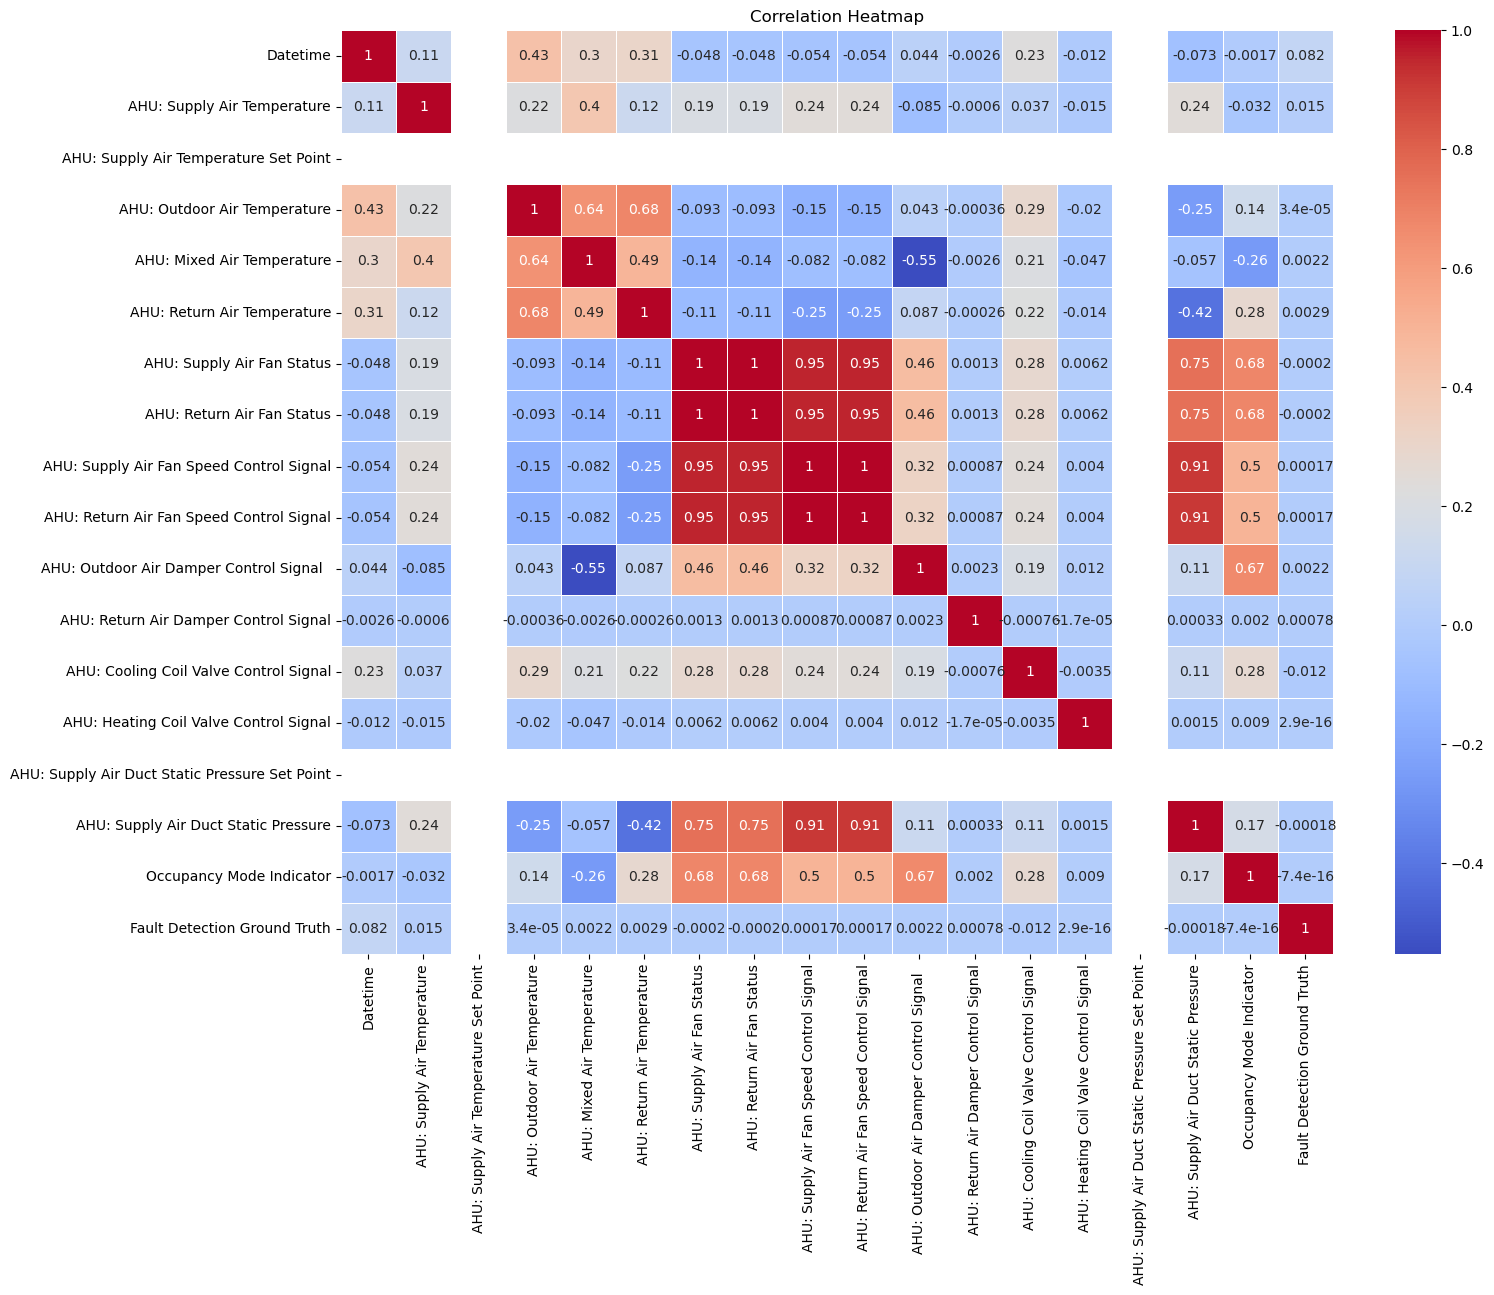

In [7]:
plt.figure(figsize=(16, 12))
corr = (df).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

The selected features are:

| Data Point Name                               | Description                                                                                      | Unit |
| --------------------------------------------- | ------------------------------------------------------------------------------------------------ | ---- |
| Datetime                                      | Timestamp of recorded data                                                                       | --   |
| AHU: Outdoor Air Temperature                  | Measured temperature of the outdoor air entering the AHU                                         | °F   |
| AHU: Mixed Air Temperature                    | Measured temperature of the mixed air (combination of outdoor and return air) in the AHU         | °F   |
| AHU: Supply Air Fan Speed Control Signal      | Control signal for AHU supply air fan speed; ranges from 0 to 1, indicating fan speed percentage | --   |
| AHU: Supply Air Temperature (target variable) | Target variable: measured temperature of the supply air leaving the AHU                          | °F   |


In [9]:
# Feature Selection
selected_features = df[['Datetime','AHU: Outdoor Air Temperature', 'AHU: Mixed Air Temperature', 
            'AHU: Supply Air Fan Speed Control Signal','AHU: Supply Air Temperature']]

The temperature features in the original dataset were in Fahrenheit. These values were converted to degrees Celsius to ensure consistency with the preferred temperature unit for analysis and modeling.


In [11]:
# Convert Fahrenheit to Celsius
def fahrenheit_to_celsius(temp_f):
    return (temp_f - 32) / 1.8

selected_features['AHU: Outdoor Air Temperature'] = fahrenheit_to_celsius(selected_features['AHU: Outdoor Air Temperature'])
selected_features['AHU: Mixed Air Temperature'] = fahrenheit_to_celsius(selected_features['AHU: Mixed Air Temperature'])
selected_features['AHU: Supply Air Temperature'] = fahrenheit_to_celsius(selected_features['AHU: Supply Air Temperature'])

C:\Users\FangPC\AppData\Local\Temp\ipykernel_17940\4223409732.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features['AHU: Outdoor Air Temperature'] = fahrenheit_to_celsius(selected_features['AHU: Outdoor Air Temperature'])
C:\Users\FangPC\AppData\Local\Temp\ipykernel_17940\4223409732.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features['AHU: Mixed Air Temperature'] = fahrenheit_to_celsius(selected_features['AHU: Mixed Air Temperature'])
C:\Users\FangPC\AppData\Local\Temp\ipy

With the unit conversion the dataset with the selected features looks like this:

| Data Point Name                               | Description                                                                                      | Unit |
| --------------------------------------------- | ------------------------------------------------------------------------------------------------ | ---- |
| Datetime                                      | Timestamp of recorded data                                                                       | --   |
| AHU: Outdoor Air Temperature                  | Measured temperature of the outdoor air entering the AHU                                         | °C   |
| AHU: Mixed Air Temperature                    | Measured temperature of the mixed air (combination of outdoor and return air) in the AHU         | °C   |
| AHU: Supply Air Fan Speed Control Signal      | Control signal for AHU supply air fan speed; ranges from 0 to 1, indicating fan speed percentage | --   |
| AHU: Supply Air Temperature (target variable) | Target variable: measured temperature of the supply air leaving the AHU                          | °C   |


In [16]:
# Define the feature columns and target variable
features = ['AHU: Outdoor Air Temperature', 'AHU: Mixed Air Temperature', 'AHU: Supply Air Fan Speed Control Signal']
target = 'AHU: Supply Air Temperature'

Through these preprocessing steps, the dataset was cleaned, structured, and ready for training with selected features expected to be predictive of the target variable.

### 4.3 Sliding Window Sampling:

#### 4.3.1 What is Sliding Window Algorithm

Sliding Window problems are problems in which a fixed or variable-size window is moved through a data structure, typically an array or string, to solve problems efficiently based on continuous subsets of elements. This technique is used when we need to find subarrays or substrings according to a given set of conditions.

<img src="2. Sliding Window.png" style="width: 500px;"/>

#### 4.3.1 Sliding Window Algorithm in the project

A sliding window algorithm was employed to create samples for training the models. This approach allowed for efficient sampling while accounting for time dependencies in the data. Two sliding windows were used:

- 15-minute window
- 30-minute window

When a gap in the data was detected that prevented generating samples for these time intervals, the window moved forward without training on those incomplete segments. This approach helped maintain consistency in the sampled intervals and avoided training on incomplete data periods, which could impact model performance.


In [17]:
# Function to filter data for consecutive periods without large time gaps
def filter_consecutive_periods(df, max_gap_minutes=1):
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    df = df.set_index('Datetime')
    df['gap'] = df.index.to_series().diff().dt.total_seconds().div(60).fillna(0)
    periods = []
    current_period = []

    for i, gap in enumerate(df['gap']):
        if gap <= max_gap_minutes:
            current_period.append(i)
        else:
            if len(current_period) >= 15:  # Minimum length for sliding window
                periods.append(df.iloc[current_period])
            current_period = []

    # Append last period if long enough
    if len(current_period) >= 15:
        periods.append(df.iloc[current_period])

    return periods

This function finds continuous time periods in the data where gaps between consecutive timestamps do not exceed a specified threshold (`max_gap_minutes`, default is 1 minute). The result is a list of consecutive data segments. The output is a list of consecutive time-based data periods (`periods`) without large gaps.


In [18]:
# Create sliding windows based on consecutive periods
def create_sliding_window(period_data, window_size):
    X_window, y_window = [], []
    for period in period_data:
        X, y = period[features], period[target]
        for i in range(len(X) - window_size):
            X_window.append(X.iloc[i:i + window_size].values.flatten())
            y_window.append(y.iloc[i + window_size])
    return np.array(X_window), np.array(y_window)

# Filter dataset for consecutive periods without gaps
period_data = filter_consecutive_periods(selected_features)

# Create sliding windows
X_15min, y_15min = create_sliding_window(period_data, 15)
X_30min, y_30min = create_sliding_window(period_data, 30)


C:\Users\FangPC\AppData\Local\Temp\ipykernel_8304\3125457158.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Datetime'] = pd.to_datetime(df['Datetime'])


This function uses a sliding window to create input-output pairs for a machine learning model from each consecutive period. The function returns arrays `X_window` and `y_window`, which contain the input-output pairs from sliding windows across all periods.


## 5. Model Selection and Methodology

For this project, three machine learning models were selected based on their suitability for regression tasks and their ability to capture different types of relationships within the data:

- Linear Regression: A fundamental model that assumes a linear relationship between the input features and the target variable. Linear regression provides a baseline for comparison with more complex models.
- Random Forest: An ensemble learning method that builds multiple decision trees and averages their outputs. Random forests are robust to overfitting, especially with high-dimensional data, and capture non-linear relationships, making them well-suited for predicting temperature patterns.
- XGBoost (Extreme Gradient Boosting): A powerful, optimized gradient-boosting algorithm that excels in handling structured data and complex patterns. XGBoost is known for its accuracy and computational efficiency, particularly in predictive tasks involving larger datasets and complex feature interactions.

Initially, these models were trained without any hyperparameter tuning to establish a baseline performance. Subsequent training iterations included hyperparameter tuning for Random Forest and XGBoost to enhance their performance.


### 5.1 Theory About the Models


#### 5.1.1 Linear Regression

Linear regression aims to establish a linear relationship between the input variables (features) and the output variable (target). The goal is to find the best-fitting line that minimizes the difference between predicted and actual values. Mathematically, this line can be represented as:

$$ y=wx+b $$

Where:

- $y$ - Dependent variable (output)
- $x$ - The input or independent variable
- $w$ - Signifies the weight or parameter vector of the approximation function (i.e slope in a simple linear equation)
- $b$ - Denotes the bias of the approximation function(y-intercept in a simple approximation) and is also known as the error term.

<img src="3. Linear_regression.png" style="width: 500px;"/>

Simple Linear Regression where the blue dots represents the observed values and the red line indicates the predicted values after linear regression.

In the project Ordinary Least Squares method is implemented which objective is to find the coefficients (slope and intercept) that minimize the sum of squared differences between the observed values $y$​ and the predicted values $\hat y$. The linear regression model is represented as:

$$ \hat y_i = w0 + w1.x_i+\epsilon \_i $$

Where:

- $x_i$ - The value of the independent variable for the i-th observation.
- $w0$ - The y-intercept (constant term)
- $w1$ - The slope coefficient.
- $\epsilon _i$ - The error term representing the difference between the observed and predicted values $(y_i-\hat y_i)$ for the i-th observation.

The objective is to minimize the sum of squared errors: Minimize : $\sum (y_i - \hat y_i)^2$

<img src="4. OLS.png" style="width: 500px;"/>


#### 5.1.2 Random Forest

##### What is Decision Tree?

A Decision tree is a flowchart-like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

A tree can be “learned” by splitting the source set into subsets based on an attribute value test. This process is repeated on each derived subset in a recursive manner called recursive partitioning. The recursion is completed when the subset at a node all has the same value of the target variable, or when splitting no longer adds value to the predictions.

The Random Forest model uses Bagging, where decision tree models with higher variance are present. It makes random feature selection to grow trees. Several random trees make a Random Forest.

<img src="7. DT.png" style="width: 500px;"/>

Random Forest algorithm is a powerful tree learning technique in Machine Learning. It works by creating a number of Decision Trees during the training phase. Each tree is constructed using a random subset of the data set to measure a random subset of features in each partition. This randomness introduces variability among individual trees, reducing the risk of overfitting and improving overall prediction performance.

In prediction, the algorithm aggregates the results of all trees, either by voting (for classification tasks) or by averaging (for regression tasks) This collaborative decision-making process, supported by multiple trees with their insights, provides an example stable and precise results. Random forests are widely used for classification and regression functions, which are known for their ability to handle complex data, reduce overfitting, and provide reliable forecasts in different environments.

<img src="9. random_forest.png" style="width: 500px;"/>

##### What is Bagging?

Bootstrap Aggregating, also known as bagging, is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. It decreases the variance and helps to avoid overfitting. It is usually applied to decision tree methods. Bagging is a special case of the model averaging approach.

##### Implementation Steps of Bagging:

- Step 1: Multiple subsets are created from the original data set with equal tuples, selecting observations with replacement.
- Step 2: A base model is created on each of these subsets.
- Step 3: Each model is learned in parallel with each training set and independent of each other.
- Step 4: The final predictions are determined by combining the predictions from all the models.

<img src="6. bagging.png" style="width: 500px;"/>


#### 5.1.3 XGBoost

XGBoost is an optimized distributed gradient boosting library designed for efficient and scalable training of machine learning models. It is an ensemble learning method that combines the predictions of multiple weak models to produce a stronger prediction. XGBoost stands for “Extreme Gradient Boosting” and it has become one of the most popular and widely used machine learning algorithms due to its ability to handle large datasets and its ability to achieve state-of-the-art performance in many machine learning tasks such as classification and regression.

##### What is Boosting?

Boosting is an ensemble modelling, technique that attempts to build a strong classifier from the number of weak classifiers. It is done by building a model by using weak models in series. Firstly, a model is built from the training data. Then the second model is built which tries to correct the errors present in the first model. This procedure is continued and models are added until either the complete training data set is predicted correctly or the maximum number of models are added.

<img src="8. Boosting.png" style="width: 500px;"/>


### 5.2 Evaluation Metrics

The performance of the models was evaluated using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE). These metrics were chosen because they provide insights into the model's accuracy in predicting continuous values:

- MAE measures the average magnitude of errors in the predictions, providing a straightforward interpretation of the prediction errors.
  $$ {MAE} = \frac{1}{n} \sum\_{i=1}^{n} | \hat{y_i} - y_i | $$

- RMSE is sensitive to larger errors due to the squaring of differences, making it a useful metric for penalizing larger deviations from the true values.

$$ {RMSE} = \sqrt{\frac{1}{n} \sum\_{i=1}^{n} (\hat{y_i} - y_i)^2 } $$

These evaluation metrics were selected to quantify the prediction accuracy of each model, balancing the effects of large and small errors in the predictions.

Where:

- $y_i$ - Actual value
- $\hat y_i$ - Predicted value
- $n$ - Total number of observations


## 6. Data Splitting and Model Training

### 6.1 Split Data into Train, Validation, and Test Sets

The dataset was split into three subsets: Training, Validation, and Test sets. The Training set was used to train the models on the historical data patterns. The Validation set allowed for tuning and optimizing model hyperparameters, ensuring the model generalized well without overfitting. Finally, the Test set provided an independent evaluation of model performance on unseen data, giving an unbiased assessment of its predictive capabilities. This three-way split ensured a robust evaluation pipeline, with each subset serving a distinct purpose in model development and assessment.


In [22]:
# Function to split data into train, validation, and test sets
def split_data(X, y, train_size=0.6, val_size=0.2):
    n = len(X)
    train_end = int(n * train_size)
    val_end = int(n * (train_size + val_size))
    
    X_train, y_train = X[:train_end], y[:train_end]
    X_val, y_val = X[train_end:val_end], y[train_end:val_end]
    X_test, y_test = X[val_end:], y[val_end:]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

# Split data for 15-minute and 30-minute sliding windows
X_train_15, y_train_15, X_val_15, y_val_15, X_test_15, y_test_15 = split_data(X_15min, y_15min)
X_train_30, y_train_30, X_val_30, y_val_30, X_test_30, y_test_30 = split_data(X_30min, y_30min)

In this code:

- Sequential Splitting: The dataset is split by selecting the first `train_size` proportion of data for the training set, the next `val_size proportion` for validation, and the remaining data for testing.
- No Random Shuffling: Sequential splitting maintains the chronological order, which is crucial for time-series data where the model should learn from past data to predict future values. Random shuffling would break this temporal order and might lead to data leakage.

#### Why Sequential Splitting is Important Here

For time-series data, each observation depends on previous values, making the order essential. If we were to shuffle data, the model might see future observations during training, which would cause data leakage and artificially inflate model performance. The sequential split ensures:


### 6.2. Model Training

The training process for each model involved specific steps tailored to the characteristics of each algorithm. Details of the training and preprocessing techniques are outlined below.

#### 6.2.1 Feature Scaling:

Feature scaling was applied exclusively to the Linear Regression model, as it is sensitive to the scale of features. The training, validation, and test sets were scaled using StandardScaler separately for the 15-minute and 30-minute windows to ensure consistent feature distribution across samples. Random Forest and XGBoost models, which are tree-based and invariant to feature scaling, were trained directly on the raw features without scaling.

For feature scaling the method of standardization is used:

$$ x*{stand} = \frac {x-mean(x)}{standard \ deviation \, (x)}, \quad x*{stand} = [-3, +3] $$


In [23]:
# === Feature Scaling Only for Linear Regression ===
scaler_15 = StandardScaler()
scaler_30 = StandardScaler()

# Scale data for Linear Regression
X_train_15_scaled = scaler_15.fit_transform(X_train_15)
X_val_15_scaled = scaler_15.transform(X_val_15)
X_test_15_scaled = scaler_15.transform(X_test_15)

X_train_30_scaled = scaler_30.fit_transform(X_train_30)
X_val_30_scaled = scaler_30.transform(X_val_30)
X_test_30_scaled = scaler_30.transform(X_test_30)

#### 6.2.2 Training Process:

- Linear Regression: The Linear Regression model served as a baseline for comparison. It was trained on the scaled features with no hyperparameter tuning. The model was evaluated on both 15-minute and 30-minute sliding window intervals to capture variations in short- and medium-term patterns in the data.

- Random Forest Regressor: A Random Forest Regressor with 100 trees (`n_estimators=100`) was chosen for its robustness and ability to handle non-linear relationships. Initially, the model was trained without hyperparameter tuning to establish a baseline. In subsequent iterations, hyperparameters such as the maximum depth of trees (`max_depth`) and minimum samples per leaf (min_samples_leaf) were adjusted to improve model performance based on validation metrics.

- XGBoost Regressor: XGBoost was also trained with 100 boosting rounds (`n_estimators=100`). As with Random Forest, the first training iteration used default hyperparameters. Further training rounds involved hyperparameter tuning of parameters like learning rate, maximum depth (`max_depth`), and subsample ratio (`subsample`) to enhance predictive accuracy. XGBoost was evaluated on both the 15-minute and 30-minute sliding windows to capture a range of temporal patterns.

Initially, these models were trained without any hyperparameter tuning to establish a baseline performance.


In [24]:
# === Function to evaluate the model ===
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = math.sqrt(mean_squared_error(y_true, y_pred))
    return mae, rmse

# === Function to train and evaluate models ===
def train_and_evaluate(model, X_train, y_train, X_val, y_val, X_test, y_test):
    model.fit(X_train, y_train)
    
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    test_preds = model.predict(X_test)

    train_mae, train_rmse = evaluate_model(y_train, train_preds)
    val_mae, val_rmse = evaluate_model(y_val, val_preds)
    test_mae, test_rmse = evaluate_model(y_test, test_preds)
    
    return train_mae, train_rmse, val_mae, val_rmse, test_mae, test_rmse

# === Linear Regression Model ===
lr_model = LinearRegression()

# Evaluate Linear Regression (with scaling)
print("--- Linear Regression (15-Minute) ---")
results_lr_15 = train_and_evaluate(lr_model, X_train_15_scaled, y_train_15, X_val_15_scaled, y_val_15, X_test_15_scaled, y_test_15)

print("--- Linear Regression (30-Minute) ---")
results_lr_30 = train_and_evaluate(lr_model, X_train_30_scaled, y_train_30, X_val_30_scaled, y_val_30, X_test_30_scaled, y_test_30)

# === Random Forest Model (No Scaling) ===
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

print("--- Random Forest (15-Minute) ---")
results_rf_15 = train_and_evaluate(rf_model, X_train_15, y_train_15, X_val_15, y_val_15, X_test_15, y_test_15)

print("--- Random Forest (30-Minute) ---")
results_rf_30 = train_and_evaluate(rf_model, X_train_30, y_train_30, X_val_30, y_val_30, X_test_30, y_test_30)

# === XGBoost Model (No Scaling) ===
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

print("--- XGBoost (15-Minute) ---")
results_xgb_15 = train_and_evaluate(xgb_model, X_train_15, y_train_15, X_val_15, y_val_15, X_test_15, y_test_15)

print("--- XGBoost (30-Minute) ---")
results_xgb_30 = train_and_evaluate(xgb_model, X_train_30, y_train_30, X_val_30, y_val_30, X_test_30, y_test_30)

# === Display Results ===
def display_results(results, title):
    print(f"\n=== {title} ===")
    print(f"Train MAE: {results[0]}, Train RMSE: {results[1]}")
    print(f"Validation MAE: {results[2]}, Validation RMSE: {results[3]}")
    print(f"Test MAE: {results[4]}, Test RMSE: {results[5]}")

# Display results for each model and sliding window size
print("\n=== 15-Minute Sliding Window ===")
display_results(results_lr_15, "Linear Regression")
display_results(results_rf_15, "Random Forest")
display_results(results_xgb_15, "XGBoost")

print("\n=== 30-Minute Sliding Window ===")
display_results(results_lr_30, "Linear Regression")
display_results(results_rf_30, "Random Forest")
display_results(results_xgb_30, "XGBoost")

--- Linear Regression (15-Minute) ---
--- Linear Regression (30-Minute) ---
--- Random Forest (15-Minute) ---
--- Random Forest (30-Minute) ---
--- XGBoost (15-Minute) ---
--- XGBoost (30-Minute) ---

=== 15-Minute Sliding Window ===

=== Linear Regression ===
Train MAE: 0.4758251543346148, Train RMSE: 1.00136357505328
Validation MAE: 0.6382324713133638, Validation RMSE: 1.449880838450537
Test MAE: 0.770486519607867, Test RMSE: 1.5904423240507235

=== Random Forest ===
Train MAE: 0.014749257277166203, Train RMSE: 0.1315094042763471
Validation MAE: 0.5457664026741581, Validation RMSE: 1.308175620939362
Test MAE: 0.7779817969867, Test RMSE: 1.8672499948357952

=== XGBoost ===
Train MAE: 0.07691152438268165, Train RMSE: 0.217100234319574
Validation MAE: 0.3789779248299942, Validation RMSE: 0.9314349371565492
Test MAE: 0.47616951124089074, Test RMSE: 0.9659853121365412

=== 30-Minute Sliding Window ===

=== Linear Regression ===
Train MAE: 0.4782344652054353, Train RMSE: 0.9804265923507315

### 6.3 Results After Initial Training

#### 15-Minute Sliding Window Results

| Model             | Train MAE | Train RMSE | Validation MAE | Validation RMSE | Test MAE | Test RMSE |
| ----------------- | --------- | ---------- | -------------- | --------------- | -------- | --------- |
| Linear Regression | 0.476     | 1.00       | 0.638          | 1.45            | 0.770    | 1.59      |
| Random Forest     | 0.015     | 0.132      | 0.555          | 1.34            | 0.803    | 1.95      |
| XGBoost           | 0.077     | 0.217      | 0.379          | 0.93            | 0.476    | 0.97      |

#### 30-Minute Sliding Window Results

| Model             | Train MAE | Train RMSE | Validation MAE | Validation RMSE | Test MAE | Test RMSE |
| ----------------- | --------- | ---------- | -------------- | --------------- | -------- | --------- |
| Linear Regression | 0.478     | 0.98       | 0.649          | 1.45            | 0.779    | 1.62      |
| Random Forest     | 0.011     | 0.126      | 0.511          | 1.28            | 0.816    | 1.98      |
| XGBoost           | 0.064     | 0.189      | 0.360          | 0.98            | 0.488    | 1.03      |

- Linear Regression struggles with high errors, indicating difficulty capturing non-linear dynamics.
- Random Forest exhibits overfitting, especially in the 15-minute window where training errors are very low, but test errors increase significantly.
- XGBoost performs best overall, with balanced training, validation, and test errors, suggesting it’s the most robust without tuning.

Looking at these results, tuning the models is indeed a the next step, especially to improve generalization on the validation and test sets.


## 7. Model Tuning and Optimization


### 7.1 Tuning 1

Below is a suggested tuning approach for each tree - based models based on their initial performance and common hyperparameters to improve MAE and RMSE.

#### 7.1.1 Tuning Strategy

##### Random Forest Regressor:

- Increase `min_samples_split` and `min_samples_leaf` to control overfitting (as indicated by very low training errors).
- Reduce `max_depth` to limit tree size, which can also help improve generalization.
- Reduce `n_estimators` slightly to decrease variance.

##### XGBoost Regressor:

- Increase regularization by adjusting `alpha` (L1) and `lambda` (L2).
- Reduce `learning_rate` and increase n_estimators to allow for finer learning steps.

#### 7.1.2 Explanation of Tuned Hyperparameters

##### Random Forest:

- Reduced `max_depth`, increased `min_samples_split`, and `min_samples_leaf` are intended to decrease model complexity and reduce overfitting.
- `max_features` at 0.8 limits the number of features considered at each split, further promoting generalization.

##### XGBoost:

- Increased regularization with `alpha` and `lambda` to control the complexity of individual trees.
- Reduced `learning_rate` and increased `n_estimators` let the model learn in smaller steps, improving accuracy without overfitting.

What is `alpha` and `lambda` in XGBoost

XGBoost supports two primary types of regularization: L1 (Lasso - alpha) and L2 (Ridge - lambda).

- L1 regularization adds the absolute values of the feature weights to the loss function, encouraging sparse models by driving some feature weights to exactly zero. In XGBoost, the strength of L1 regularization is controlled by the alpha hyperparameter. Higher values of alpha lead to more feature weights being set to zero, resulting in a simpler, more interpretable model.

  $$ Cost = \sum*{i=0}^{N} \left( y_i - \sum*{j=0}^{M} x*{ij} W_j \right)^2 + \lambda \sum*{j=0}^{M} |W_j| $$

  Where:

  - Loss Function $ \sum*{i=0}^{N} \left( y_i - \sum*{j=0}^{M} x\_{ij} W_j \right)^2 $ : This part calculates the Mean Squared Error (MSE) between the predicted values and the actual target values. It measures how well the model's predictions match the actual data.

  - Regularization Term $ \lambda \sum\_{j=0}^{M} |W_j| $: This is the L1 regularization term. It adds the absolute values of the weights $W_j$ to the cost. This term penalizes large weights, encouraging the model to shrink some weights to exactly zero, which can lead to sparser models (i.e., some weights are zero, which can aid in feature selection).

- L2 regularization adds the squared values of the feature weights to the loss function. Unlike L1, L2 regularization encourages smaller, more evenly distributed feature weights rather than driving them to zero. In XGBoost, the lambda hyperparameter controls the strength of L2 regularization. Higher values of lambda result in smaller feature weights and a more regularized model.

  $$ Cost = \sum*{i=0}^{N} \left( y_i - \sum*{j=0}^{M} x*{ij} W_j \right)^2 + \lambda \sum*{j=0}^{M} W_j^2 $$

  Where:

  - Loss Function $ \sum*{i=0}^{N} \left( y_i - \sum*{j=0}^{M} x\_{ij} W_j \right)^2 $ : This is the same Mean Squared Error (MSE) term as in L1 regularization.

  - Regularization Term $ \lambda \sum\_{j=0}^{M} W_j^2 $: his is the L2 regularization term. It adds the squared values of the weights $W_j$ to the cost. Unlike L1 regularization, L2 penalizes large weights but does not force any weights to become zero. This often leads to small but non-zero weights across features, which can help in generalization.


In [25]:
# Tuned Random Forest Model
rf_model_15 = RandomForestRegressor(
    n_estimators=50,             # Reduced number of trees
    max_depth=10,                # Limit depth for generalization
    min_samples_split=10,        # Minimum samples for split to reduce overfitting
    min_samples_leaf=5,          # Minimum samples in leaf
    max_features=0.8,            # Use 80% of features at each split
    random_state=42
)

rf_model_30 = RandomForestRegressor(
    n_estimators=50,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features=0.8,
    random_state=42
)

# Tuned XGBoost Model
xgb_model_15 = xgb.XGBRegressor(
    n_estimators=200,            # More trees for finer learning
    max_depth=3,                 # Reduced depth for generalization
    learning_rate=0.05,          # Smaller learning rate
    alpha=10,                    # L1 regularization
    reg_lambda=10,               # L2 regularization
    subsample=0.8,               # Subsample data to reduce overfitting
    colsample_bytree=0.8,        # Use 80% of features for each tree
    random_state=42
)

xgb_model_30 = xgb.XGBRegressor(
    n_estimators=200,
    max_depth=3,
    learning_rate=0.05,
    alpha=10,
    reg_lambda=10,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# === Model Evaluation Functions Remain the Same ===
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = math.sqrt(mean_squared_error(y_true, y_pred))
    return mae, rmse

def train_and_evaluate(model, X_train, y_train, X_val, y_val, X_test, y_test):
    model.fit(X_train, y_train)
    
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    test_preds = model.predict(X_test)

    train_mae, train_rmse = evaluate_model(y_train, train_preds)
    val_mae, val_rmse = evaluate_model(y_val, val_preds)
    test_mae, test_rmse = evaluate_model(y_test, test_preds)
    
    return train_mae, train_rmse, val_mae, val_rmse, test_mae, test_rmse

# === Evaluate Each Model with Tuning ===
print("\n=== 15-Minute Sliding Window with Tuning ===")
results_rf_15_tuned = train_and_evaluate(rf_model_15, X_train_15, y_train_15, X_val_15, y_val_15, X_test_15, y_test_15)
results_xgb_15_tuned = train_and_evaluate(xgb_model_15, X_train_15, y_train_15, X_val_15, y_val_15, X_test_15, y_test_15)

print("\n=== 30-Minute Sliding Window with Tuning ===")
results_rf_30_tuned = train_and_evaluate(rf_model_30, X_train_30, y_train_30, X_val_30, y_val_30, X_test_30, y_test_30)
results_xgb_30_tuned = train_and_evaluate(xgb_model_30, X_train_30, y_train_30, X_val_30, y_val_30, X_test_30, y_test_30)

# === Display Results with Tuning ===
def display_results(results, title):
    print(f"\n=== {title} ===")
    print(f"Train MAE: {results[0]}, Train RMSE: {results[1]}")
    print(f"Validation MAE: {results[2]}, Validation RMSE: {results[3]}")
    print(f"Test MAE: {results[4]}, Test RMSE: {results[5]}")

# Print all tuned results
print("\n=== Tuned 15-Minute Sliding Window ===")
display_results(results_rf_15_tuned, "Random Forest")
display_results(results_xgb_15_tuned, "XGBoost")

print("\n=== Tuned 30-Minute Sliding Window ===")
display_results(results_rf_30_tuned, "Random Forest")
display_results(results_xgb_30_tuned, "XGBoost")


=== 15-Minute Sliding Window with Tuning ===

=== 30-Minute Sliding Window with Tuning ===

=== Tuned 15-Minute Sliding Window ===

=== Random Forest ===
Train MAE: 0.10178769214224485, Train RMSE: 0.26457973723958805
Validation MAE: 0.4037650769094855, Validation RMSE: 1.0109422789756797
Test MAE: 0.6424122971729718, Test RMSE: 1.476686972401754

=== XGBoost ===
Train MAE: 0.17941015543072827, Train RMSE: 0.36544016931108547
Validation MAE: 0.36304845125846613, Validation RMSE: 0.7024383328168528
Test MAE: 0.4827901898535736, Test RMSE: 0.8382291901065804

=== Tuned 30-Minute Sliding Window ===

=== Random Forest ===
Train MAE: 0.09475429569316751, Train RMSE: 0.24861985375696183
Validation MAE: 0.38181631970679386, Validation RMSE: 0.9538663955724036
Test MAE: 0.6630576387923866, Test RMSE: 1.493439656973545

=== XGBoost ===
Train MAE: 0.1785518163056681, Train RMSE: 0.35400659369005355
Validation MAE: 0.35472354304585124, Validation RMSE: 0.6832973676647108
Test MAE: 0.474447438825

### 7.1.3 Results After Tuning 1

#### 15-Minute Sliding Window Results

| Model         | Train MAE | Train RMSE | Validation MAE | Validation RMSE | Test MAE | Test RMSE |
| ------------- | --------- | ---------- | -------------- | --------------- | -------- | --------- |
| Random Forest | 0.102     | 0.265      | 0.413          | 1.07            | 0.667    | 1.58      |
| XGBoost       | 0.179     | 0.365      | 0.363          | 0.70            | 0.483    | 0.84      |

#### 30-Minute Sliding Window Results

| Model         | Train MAE | Train RMSE | Validation MAE | Validation RMSE | Test MAE | Test RMSE |
| ------------- | --------- | ---------- | -------------- | --------------- | -------- | --------- |
| Random Forest | 0.094     | 0.248      | 0.391          | 1.04            | 0.694    | 1.63      |
| XGBoost       | 0.179     | 0.354      | 0.355          | 0.68            | 0.474    | 0.83      |

- Random Forest shows improved generalization, especially with reduced training errors, though test errors remain high compared to XGBoost.
- XGBoost achieves better results across validation and test sets, especially in the 30-minute sliding window, with the lowest test MAE and RMSE.


### 7.2 Tuning 2

Let's proceed with a second round of tuning to further improve the XGBoost and Random Forest models. This second tuning will involve:

#### 7.2.1 Tuning Strategy

##### Random Forest Regressor:

- Further limit `max_depth` and increase `min_samples_split` and `min_samples_leaf` to reduce overfitting.
- Slightly increase `n_estimators` to balance out the increased regularization.

##### XGBoost Regressor:

- Increase `alpha` and `lambda` for stronger regularization.
- Lower the `learning_rate` even further to allow finer learning.
- Increase ``n_estimators` to give the model more trees to adjust to this reduced learning rate.

#### 7.2.2 Explanation of Tuned Hyperparameters

##### Random Forest:

- Decreased `max_depth` to 8, increased `min_samples_split` to 15 and `min_samples_leaf` to 10 to ensure deeper regularization and reduced overfitting.
- Increased `n_estimators` slightly to allow the model to compensate for reduced complexity.

##### XGBoost:

- Further increased regularization (`alpha` and `lambda`) and reduced `learning_rate` to 0.03 to make learning steps finer.
- Increased `n_estimators` to 250 to provide additional rounds of boosting at the lower learning rate.
- Reduced `subsample` and `colsample_bytree` to 0.75 to add additional regularization.


In [26]:
# === Second Round Tuning Configurations for Random Forest and XGBoost ===

# Further Tuned Random Forest Model
rf_model_15_further_tuned = RandomForestRegressor(
    n_estimators=75,              # Slightly more trees to balance increased regularization
    max_depth=8,                  # Further reduce max depth
    min_samples_split=15,         # Increased minimum samples to split
    min_samples_leaf=10,          # Increased minimum samples in leaf
    max_features=0.7,             # Slightly reduced features at each split
    random_state=42
)

rf_model_30_further_tuned = RandomForestRegressor(
    n_estimators=75,
    max_depth=8,
    min_samples_split=15,
    min_samples_leaf=10,
    max_features=0.7,
    random_state=42
)

# Further Tuned XGBoost Model
xgb_model_15_further_tuned = xgb.XGBRegressor(
    n_estimators=250,             # Increased trees for finer adjustments
    max_depth=3,                  # Keep max depth low
    learning_rate=0.03,           # Lower learning rate
    alpha=15,                     # Increased L1 regularization
    reg_lambda=15,                # Increased L2 regularization
    subsample=0.75,               # Slightly lower subsample to reduce overfitting
    colsample_bytree=0.75,        # Use 75% of features for each tree
    random_state=42
)

xgb_model_30_further_tuned = xgb.XGBRegressor(
    n_estimators=250,
    max_depth=3,
    learning_rate=0.03,
    alpha=15,
    reg_lambda=15,
    subsample=0.75,
    colsample_bytree=0.75,
    random_state=42
)

# === Model Evaluation Functions Remain the Same ===
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = math.sqrt(mean_squared_error(y_true, y_pred))
    return mae, rmse

def train_and_evaluate(model, X_train, y_train, X_val, y_val, X_test, y_test):
    model.fit(X_train, y_train)
    
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    test_preds = model.predict(X_test)

    train_mae, train_rmse = evaluate_model(y_train, train_preds)
    val_mae, val_rmse = evaluate_model(y_val, val_preds)
    test_mae, test_rmse = evaluate_model(y_test, test_preds)
    
    return train_mae, train_rmse, val_mae, val_rmse, test_mae, test_rmse

# === Evaluate Each Model with Further Tuning ===
print("\n=== 15-Minute Sliding Window with Further Tuning ===")
results_rf_15_further_tuned = train_and_evaluate(rf_model_15_further_tuned, X_train_15, y_train_15, X_val_15, y_val_15, X_test_15, y_test_15)
results_xgb_15_further_tuned = train_and_evaluate(xgb_model_15_further_tuned, X_train_15, y_train_15, X_val_15, y_val_15, X_test_15, y_test_15)

print("\n=== 30-Minute Sliding Window with Further Tuning ===")
results_rf_30_further_tuned = train_and_evaluate(rf_model_30_further_tuned, X_train_30, y_train_30, X_val_30, y_val_30, X_test_30, y_test_30)
results_xgb_30_further_tuned = train_and_evaluate(xgb_model_30_further_tuned, X_train_30, y_train_30, X_val_30, y_val_30, X_test_30, y_test_30)

# === Display Results with Further Tuning ===
def display_results(results, title):
    print(f"\n=== {title} ===")
    print(f"Train MAE: {results[0]}, Train RMSE: {results[1]}")
    print(f"Validation MAE: {results[2]}, Validation RMSE: {results[3]}")
    print(f"Test MAE: {results[4]}, Test RMSE: {results[5]}")

# Print all further tuned results
print("\n=== Further Tuned 15-Minute Sliding Window ===")
display_results(results_rf_15_further_tuned, "Random Forest")
display_results(results_xgb_15_further_tuned, "XGBoost")

print("\n=== Further Tuned 30-Minute Sliding Window ===")
display_results(results_rf_30_further_tuned, "Random Forest")
display_results(results_xgb_30_further_tuned, "XGBoost")


=== 15-Minute Sliding Window with Further Tuning ===

=== 30-Minute Sliding Window with Further Tuning ===

=== Further Tuned 15-Minute Sliding Window ===

=== Random Forest ===
Train MAE: 0.12770887503985479, Train RMSE: 0.30247698530572165
Validation MAE: 0.4151532181169623, Validation RMSE: 1.016351182789694
Test MAE: 0.6389252138448058, Test RMSE: 1.4780706102471985

=== XGBoost ===
Train MAE: 0.1980355945899595, Train RMSE: 0.38945452172990946
Validation MAE: 0.37125734965785656, Validation RMSE: 0.7211506370269156
Test MAE: 0.4883281750436697, Test RMSE: 0.850603087299114

=== Further Tuned 30-Minute Sliding Window ===

=== Random Forest ===
Train MAE: 0.12163966834990232, Train RMSE: 0.28620336751040926
Validation MAE: 0.3957331145187289, Validation RMSE: 0.9486261773849674
Test MAE: 0.6324087183109538, Test RMSE: 1.415379526831708

=== XGBoost ===
Train MAE: 0.19491924488656281, Train RMSE: 0.37846661156433686
Validation MAE: 0.3681645389037142, Validation RMSE: 0.721449353753

### 7.2.3 Results After Tuning 2

#### 15-Minute Sliding Window Results

| Model         | Train MAE | Train RMSE | Validation MAE | Validation RMSE | Test MAE | Test RMSE |
| ------------- | --------- | ---------- | -------------- | --------------- | -------- | --------- |
| Random Forest | 0.127     | 0.302      | 0.414          | 1.01            | 0.635    | 1.47      |
| XGBoost       | 0.198     | 0.389      | 0.371          | 0.72            | 0.488    | 0.85      |

#### 30-Minute Sliding Window Results

| Model         | Train MAE | Train RMSE | Validation MAE | Validation RMSE | Test MAE | Test RMSE |
| ------------- | --------- | ---------- | -------------- | --------------- | -------- | --------- |
| Random Forest | 0.121     | 0.286      | 0.394          | 0.94            | 0.624    | 1.39      |
| XGBoost       | 0.195     | 0.378      | 0.368          | 0.72            | 0.487    | 0.85      |

- Random Forest shows improved generalization in both validation and test sets, but still trails XGBoost in overall performance.
- XGBoost maintains the lowest validation and test errors, making it the top choice for robust predictions.


## 8. Results and Conclusion

After tuning, XGBoost consistently achieved the best performance across all configurations, particularly with the 30-minute sliding window, indicating that this setup captures temporal dependencies effectively and generalizes well.

### Model Performance Results by Configuration

| Model             | Window | Configuration | Train MAE | Train RMSE | Validation MAE | Validation RMSE | Test MAE | Test RMSE |
| ----------------- | ------ | ------------- | --------- | ---------- | -------------- | --------------- | -------- | --------- |
| Linear Regression | 15-min | No Tuning     | 0.476     | 1.00       | 0.638          | 1.45            | 0.770    | 1.59      |
| Random Forest     | 15-min | No Tuning     | 0.015     | 0.132      | 0.555          | 1.34            | 0.803    | 1.95      |
| XGBoost           | 15-min | No Tuning     | 0.077     | 0.217      | 0.379          | 0.93            | 0.476    | 0.97      |
| Random Forest     | 15-min | Tuned Round 1 | 0.102     | 0.265      | 0.413          | 1.07            | 0.667    | 1.58      |
| XGBoost           | 15-min | Tuned Round 1 | 0.179     | 0.365      | 0.363          | 0.70            | 0.483    | 0.84      |
| Random Forest     | 15-min | Tuned Round 2 | 0.127     | 0.302      | 0.414          | 1.01            | 0.635    | 1.47      |
| XGBoost           | 15-min | Tuned Round 2 | 0.198     | 0.389      | 0.371          | 0.72            | 0.488    | 0.85      |
| Linear Regression | 30-min | No Tuning     | 0.478     | 0.98       | 0.649          | 1.45            | 0.779    | 1.62      |
| Random Forest     | 30-min | No Tuning     | 0.011     | 0.126      | 0.511          | 1.28            | 0.816    | 1.98      |
| XGBoost           | 30-min | No Tuning     | 0.064     | 0.189      | 0.360          | 0.98            | 0.488    | 1.03      |
| Random Forest     | 30-min | Tuned Round 1 | 0.094     | 0.248      | 0.391          | 1.04            | 0.694    | 1.63      |
| XGBoost           | 30-min | Tuned Round 1 | 0.179     | 0.354      | 0.355          | 0.68            | 0.474    | 0.83      |
| Random Forest     | 30-min | Tuned Round 2 | 0.121     | 0.286      | 0.394          | 0.94            | 0.624    | 1.39      |
| XGBoost           | 30-min | Tuned Round 2 | 0.195     | 0.378      | 0.368          | 0.72            | 0.487    | 0.85      |

### Expected Range for Predicted Supply Air Temperature

When the true supply air temperature is 22°C:

### MAE Interpretation:

- The predicted temperature will typically be within 0.487°C of 22°C.
- Expected range based on MAE: [21.51°C, 22.49°C].

### RMSE Interpretation:

- RMSE indicates that the predictions will likely fall within 0.85°C of 22°C, covering a wider range than MAE.
- Expected range based on RMSE: [21.15°C, 22.85°C].

### Final Recommendation

XGBoost with the 30-minute sliding window after the second round of tuning provides the best balance of accuracy and generalization. The Random Forest model shows improved generalization with tuning but does not outperform XGBoost.

For practical application, XGBoost with the 30-minute sliding window configuration could be deployed to ensure accurate predictions of the supply air temperature, supporting efficient AHU operation and temperature control.


## 9. References

- [Dataset](https://figshare.com/articles/dataset/LBNLDataSynthesisInventory_pdf/11752740?file=21403008)

- [Prediction of HVAC System Parameters Using Deep Learning](https://hal.science/hal-03930752/document)

- [Sliding Window Algorithm](https://favtutor.com/blogs/sliding-window-algorithm)

- [Sliding Window Technique](https://www.geeksforgeeks.org/window-sliding-technique/)

- [Implementing Linear Regression From Scratch](https://medium.com/@pritioli/implementing-linear-regression-from-scratch-747343634494)

- [Random Forest Algorithm in Machine Learning](https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/)

- [XGBoost](https://www.geeksforgeeks.org/xgboost/)

- [Bagging vs Boosting in Machine Learning](https://www.geeksforgeeks.org/bagging-vs-boosting-in-machine-learning/)

- [XGBoost Regularization Techniques](https://xgboosting.com/xgboost-regularization-techniques/)

- [L1 vs L2 Regularization: The intuitive difference](https://medium.com/analytics-vidhya/l1-vs-l2-regularization-which-is-better-d01068e6658c)
